In [47]:
import tensorflow as tf
import os

In [48]:
gpus = tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [49]:
import cv2 #open cv
import imghdr #import hdr

In [50]:
data_dir = 'data'
image_exts = ['jpeg', 'jpg', 'png', 'gif', 'bmp']

In [51]:
for image_class in os.listdir(data_dir):
    # Skip the .DS_Store file
    if image_class == '.DS_Store':
        continue

    # Loop through every image in the folder
    class_dir = os.path.join(data_dir, image_class)
    if os.path.isdir(class_dir):
        for image in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image)
            
            try:
                # Use OpenCV to read the image
                img = cv2.imread(image_path)
                
                # Use imghdr to determine the image format
                tip = imghdr.what(image_path)
                
                if tip not in image_exts:
                    print("Removing image with unsupported format: {}".format(image_path))
                    # Remove the image if it does not have a supported format
                    os.remove(image_path)
            except Exception as e:
                print('Issue with image {}: {}'.format(image_path, str(e)))

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: cHRM chunk does not match sRGB
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: cHRM chunk does not match sRGB


In [52]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

In [53]:
data = tf.keras.utils.image_dataset_from_directory('data')
data_iterator = data.as_numpy_iterator()
for batch in data_iterator:
    images, labels = batch


Found 232 files belonging to 2 classes.


2023-08-04 00:38:20.201236: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:38:20.201266: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2023-08-04 00:38:21.507790: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:38:21.507809: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


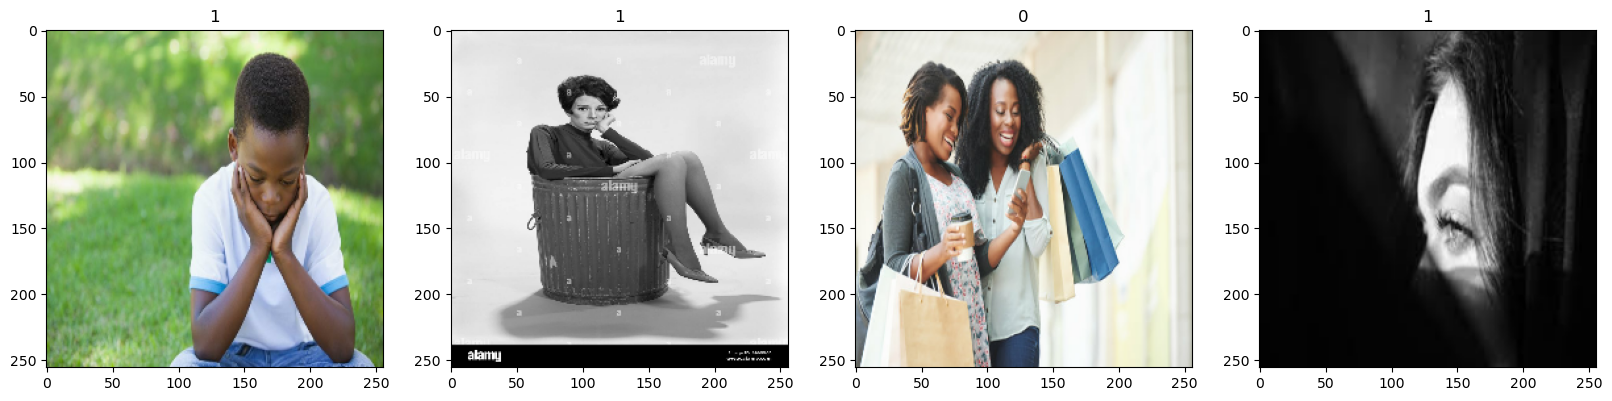

In [54]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [55]:
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

2023-08-04 00:38:22.705451: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:38:22.705636: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2023-08-04 00:38:23.977433: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:38:23.977451: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


(array([[[[5.88235296e-02, 5.88235296e-02, 5.88235296e-02],
          [5.88235296e-02, 5.88235296e-02, 5.88235296e-02],
          [5.88235296e-02, 5.88235296e-02, 5.88235296e-02],
          ...,
          [5.88235296e-02, 5.88235296e-02, 5.88235296e-02],
          [5.88235296e-02, 5.88235296e-02, 5.88235296e-02],
          [5.88235296e-02, 5.88235296e-02, 5.88235296e-02]],
 
         [[5.88235296e-02, 5.88235296e-02, 5.88235296e-02],
          [5.88235296e-02, 5.88235296e-02, 5.88235296e-02],
          [5.88235296e-02, 5.88235296e-02, 5.88235296e-02],
          ...,
          [5.88235296e-02, 5.88235296e-02, 5.88235296e-02],
          [5.88235296e-02, 5.88235296e-02, 5.88235296e-02],
          [5.88235296e-02, 5.88235296e-02, 5.88235296e-02]],
 
         [[5.88235296e-02, 5.88235296e-02, 5.88235296e-02],
          [5.88235296e-02, 5.88235296e-02, 5.88235296e-02],
          [5.88235296e-02, 5.88235296e-02, 5.88235296e-02],
          ...,
          [5.88235296e-02, 5.88235296e-02, 5.8823

In [56]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [57]:
train_size

5

In [58]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [59]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [60]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Convolution2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Convolution2D(32, (3,3), 1, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Convolution2D(16, (3,3), 1, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [61]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [62]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

In [63]:
logdir='logs'

In [64]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [65]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


2023-08-04 00:38:25.106793: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:38:25.106819: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2023-08-04 00:38:26.397854: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:38:26.397872: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


5/5 [==============================] - ETA: 0s - loss: 1.5247 - accuracy: 0.4313

2023-08-04 00:38:28.535927: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:38:28.536059: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2023-08-04 00:38:29.809966: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:38:29.809983: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


5/5 [==============================] - 6s 809ms/step - loss: 1.5247 - accuracy: 0.4313 - val_loss: 0.8465 - val_accuracy: 0.4375
Epoch 2/20


2023-08-04 00:38:30.599770: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:38:30.599797: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2023-08-04 00:38:31.852822: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:38:31.852838: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


5/5 [==============================] - ETA: 0s - loss: 0.7268 - accuracy: 0.5625

2023-08-04 00:38:34.098790: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:38:34.098819: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2023-08-04 00:38:35.340554: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:38:35.340570: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


5/5 [==============================] - 5s 790ms/step - loss: 0.7268 - accuracy: 0.5625 - val_loss: 0.6985 - val_accuracy: 0.5000
Epoch 3/20


2023-08-04 00:38:36.059947: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:38:36.059961: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2023-08-04 00:38:37.347792: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:38:37.347810: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


5/5 [==============================] - ETA: 0s - loss: 0.6723 - accuracy: 0.7000

2023-08-04 00:38:39.313150: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:38:39.313169: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2023-08-04 00:38:40.551475: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:38:40.551511: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


5/5 [==============================] - 5s 752ms/step - loss: 0.6723 - accuracy: 0.7000 - val_loss: 0.6569 - val_accuracy: 0.6250
Epoch 4/20


2023-08-04 00:38:41.273943: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:38:41.273958: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2023-08-04 00:38:42.517963: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:38:42.518001: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


5/5 [==============================] - ETA: 0s - loss: 0.6523 - accuracy: 0.5875

2023-08-04 00:38:44.701051: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:38:44.701083: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2023-08-04 00:38:45.951926: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:38:45.951944: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


5/5 [==============================] - 5s 814ms/step - loss: 0.6523 - accuracy: 0.5875 - val_loss: 0.6159 - val_accuracy: 0.6562
Epoch 5/20


2023-08-04 00:38:46.675110: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:38:46.675135: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2023-08-04 00:38:47.923358: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:38:47.923377: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


5/5 [==============================] - ETA: 0s - loss: 0.6426 - accuracy: 0.6000

2023-08-04 00:38:49.923692: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:38:49.923722: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2023-08-04 00:38:51.177060: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:38:51.177083: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


5/5 [==============================] - 5s 758ms/step - loss: 0.6426 - accuracy: 0.6000 - val_loss: 0.6500 - val_accuracy: 0.6250
Epoch 6/20


2023-08-04 00:38:51.939747: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:38:51.939765: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2023-08-04 00:38:53.284933: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:38:53.284949: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


5/5 [==============================] - ETA: 0s - loss: 0.6127 - accuracy: 0.6625

2023-08-04 00:38:55.504321: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:38:55.504349: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2023-08-04 00:38:56.761760: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:38:56.761784: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


5/5 [==============================] - 6s 840ms/step - loss: 0.6127 - accuracy: 0.6625 - val_loss: 0.6257 - val_accuracy: 0.5938
Epoch 7/20


2023-08-04 00:38:57.573193: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:38:57.573207: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2023-08-04 00:38:58.825462: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:38:58.825495: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


5/5 [==============================] - ETA: 0s - loss: 0.5672 - accuracy: 0.7437

2023-08-04 00:39:00.850654: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:39:00.850678: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2023-08-04 00:39:02.145008: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:39:02.145026: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


5/5 [==============================] - 5s 789ms/step - loss: 0.5672 - accuracy: 0.7437 - val_loss: 0.4719 - val_accuracy: 0.7500
Epoch 8/20


2023-08-04 00:39:02.884672: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:39:02.884687: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2023-08-04 00:39:04.110525: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:39:04.110542: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


5/5 [==============================] - ETA: 0s - loss: 0.4831 - accuracy: 0.7500

2023-08-04 00:39:06.175506: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:39:06.175534: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2023-08-04 00:39:07.421182: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:39:07.421216: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


5/5 [==============================] - 5s 782ms/step - loss: 0.4831 - accuracy: 0.7500 - val_loss: 0.5299 - val_accuracy: 0.6875
Epoch 9/20


2023-08-04 00:39:08.160969: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:39:08.160983: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2023-08-04 00:39:09.403856: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:39:09.403906: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


5/5 [==============================] - ETA: 0s - loss: 0.4432 - accuracy: 0.7437

2023-08-04 00:39:11.451604: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:39:11.451621: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2023-08-04 00:39:12.700191: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:39:12.700207: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


5/5 [==============================] - 5s 773ms/step - loss: 0.4432 - accuracy: 0.7437 - val_loss: 0.4128 - val_accuracy: 0.8750
Epoch 10/20


2023-08-04 00:39:13.424867: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:39:13.424882: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2023-08-04 00:39:14.665555: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:39:14.665571: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


5/5 [==============================] - ETA: 0s - loss: 0.4348 - accuracy: 0.8438

2023-08-04 00:39:16.670377: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:39:16.670404: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2023-08-04 00:39:17.932628: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:39:17.932646: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


5/5 [==============================] - 5s 770ms/step - loss: 0.4348 - accuracy: 0.8438 - val_loss: 0.4567 - val_accuracy: 0.7500
Epoch 11/20


2023-08-04 00:39:18.651566: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:39:18.651594: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2023-08-04 00:39:19.902651: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:39:19.902668: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


5/5 [==============================] - ETA: 0s - loss: 0.3419 - accuracy: 0.8375

2023-08-04 00:39:22.056169: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:39:22.056184: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2023-08-04 00:39:23.359825: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:39:23.359845: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


5/5 [==============================] - 5s 817ms/step - loss: 0.3419 - accuracy: 0.8375 - val_loss: 0.3953 - val_accuracy: 0.8438
Epoch 12/20


2023-08-04 00:39:24.093882: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:39:24.093912: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2023-08-04 00:39:25.343052: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:39:25.343092: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


5/5 [==============================] - ETA: 0s - loss: 0.3039 - accuracy: 0.8750

2023-08-04 00:39:27.436699: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:39:27.436714: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2023-08-04 00:39:28.690962: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:39:28.690982: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


5/5 [==============================] - 5s 783ms/step - loss: 0.3039 - accuracy: 0.8750 - val_loss: 0.2120 - val_accuracy: 0.9688
Epoch 13/20


2023-08-04 00:39:29.419531: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:39:29.419544: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2023-08-04 00:39:30.680420: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:39:30.680797: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


5/5 [==============================] - ETA: 0s - loss: 0.2614 - accuracy: 0.9250

2023-08-04 00:39:32.784411: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:39:32.784438: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2023-08-04 00:39:34.086907: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:39:34.086923: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


5/5 [==============================] - 5s 785ms/step - loss: 0.2614 - accuracy: 0.9250 - val_loss: 0.2563 - val_accuracy: 0.9062
Epoch 14/20


2023-08-04 00:39:34.811318: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:39:34.811332: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2023-08-04 00:39:36.062581: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:39:36.062604: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


5/5 [==============================] - ETA: 0s - loss: 0.1997 - accuracy: 0.9125

2023-08-04 00:39:38.054398: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:39:38.054413: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2023-08-04 00:39:39.299397: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:39:39.299416: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


5/5 [==============================] - 5s 756ms/step - loss: 0.1997 - accuracy: 0.9125 - val_loss: 0.1027 - val_accuracy: 1.0000
Epoch 15/20


2023-08-04 00:39:40.029875: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:39:40.029891: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2023-08-04 00:39:41.278519: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:39:41.278536: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


5/5 [==============================] - ETA: 0s - loss: 0.1261 - accuracy: 0.9625

2023-08-04 00:39:43.263088: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:39:43.263106: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2023-08-04 00:39:44.505895: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:39:44.505918: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


5/5 [==============================] - 5s 777ms/step - loss: 0.1261 - accuracy: 0.9625 - val_loss: 0.0873 - val_accuracy: 0.9688
Epoch 16/20


2023-08-04 00:39:45.290217: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:39:45.290233: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2023-08-04 00:39:46.533602: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:39:46.533620: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


5/5 [==============================] - ETA: 0s - loss: 0.0994 - accuracy: 0.9812

2023-08-04 00:39:48.628180: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:39:48.628197: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2023-08-04 00:39:49.903437: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:39:49.903466: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


5/5 [==============================] - 5s 788ms/step - loss: 0.0994 - accuracy: 0.9812 - val_loss: 0.0800 - val_accuracy: 1.0000
Epoch 17/20


2023-08-04 00:39:50.633023: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:39:50.633133: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2023-08-04 00:39:51.887365: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:39:51.887383: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


5/5 [==============================] - ETA: 0s - loss: 0.0778 - accuracy: 0.9688

2023-08-04 00:39:54.136243: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:39:54.136261: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2023-08-04 00:39:55.393912: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:39:55.393927: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


5/5 [==============================] - 5s 817ms/step - loss: 0.0778 - accuracy: 0.9688 - val_loss: 0.0455 - val_accuracy: 1.0000
Epoch 18/20


2023-08-04 00:39:56.109464: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:39:56.109491: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2023-08-04 00:39:57.383595: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:39:57.383613: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


5/5 [==============================] - ETA: 0s - loss: 0.0532 - accuracy: 1.0000

2023-08-04 00:39:59.389401: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:39:59.389421: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2023-08-04 00:40:00.641358: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:40:00.641418: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


5/5 [==============================] - 5s 759ms/step - loss: 0.0532 - accuracy: 1.0000 - val_loss: 0.0625 - val_accuracy: 0.9375
Epoch 19/20


2023-08-04 00:40:01.364799: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:40:01.364815: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2023-08-04 00:40:02.626524: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:40:02.626547: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


5/5 [==============================] - ETA: 0s - loss: 0.0447 - accuracy: 0.9812

2023-08-04 00:40:04.572221: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:40:04.572238: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2023-08-04 00:40:05.813902: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:40:05.813920: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


5/5 [==============================] - 5s 747ms/step - loss: 0.0447 - accuracy: 0.9812 - val_loss: 0.0171 - val_accuracy: 1.0000
Epoch 20/20


2023-08-04 00:40:06.529864: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:40:06.529898: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2023-08-04 00:40:07.814951: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:40:07.814972: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


5/5 [==============================] - ETA: 0s - loss: 0.0225 - accuracy: 0.9937

2023-08-04 00:40:09.894183: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:40:09.894308: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB
2023-08-04 00:40:11.295917: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-08-04 00:40:11.295939: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: cHRM chunk does not match sRGB


5/5 [==============================] - 6s 839ms/step - loss: 0.0225 - accuracy: 0.9937 - val_loss: 0.0089 - val_accuracy: 1.0000


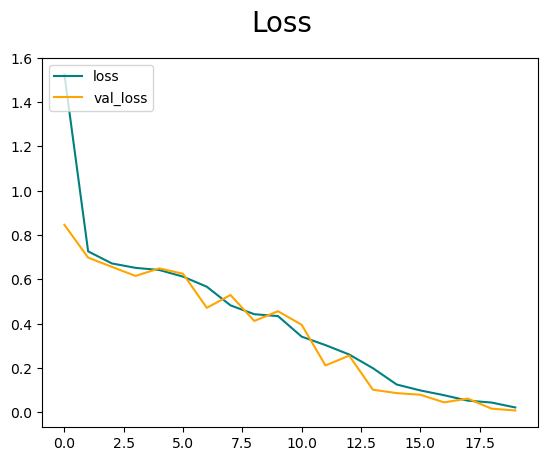

In [66]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

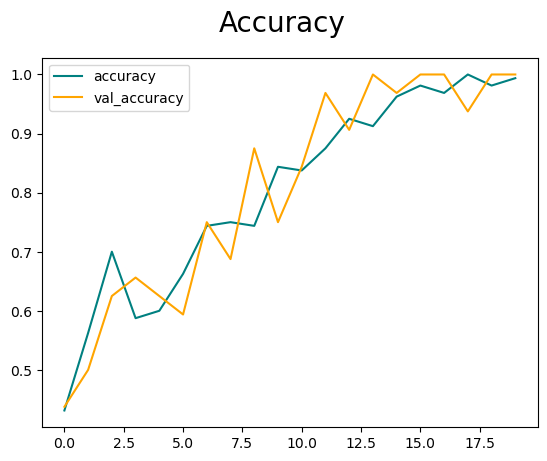

In [67]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [68]:
pre = tf.keras.metrics.Precision()
re = tf.keras.metrics.Recall()
acc = tf.keras.metrics.BinaryAccuracy()

In [69]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [70]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


[ WARN:0@3126.060] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_d9lyif19nl/croot/opencv-suite_1676472756314/work/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('960x0.jpg'): can't open/read file: check file path/integrity


TypeError: Image data of dtype object cannot be converted to float

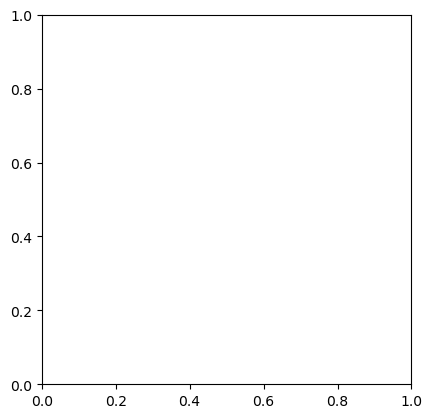

In [76]:
img = cv2.imread('960x0.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

OpenCV version: 4.6.0
